In [48]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

In [49]:
data = pd.read_csv('bottle.csv')

In [50]:
#Data Exploration
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [52]:
data.isnull().sum()
#Missing approimately 13% of temperature values and over half of all salinity values 

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
T_degC                  10963
Salnty                  47354
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
RecInd                      0
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
                        ...  
MeanAs                 842213
MeanAp                 844406
MeanAq    

In [53]:
#Replacing all the null values in the temperature and salinity columns with the mean 
data['T_degC'] = data['T_degC'].fillna(data['T_degC'].mean())
data['Salnty'] = data['Salnty'].fillna(data['Salnty'].mean())

In [54]:
#Checking to see that all null values have been replaced 
data.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
T_degC                      0
Salnty                      0
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
RecInd                      0
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
                        ...  
MeanAs                 842213
MeanAp                 844406
MeanAq    

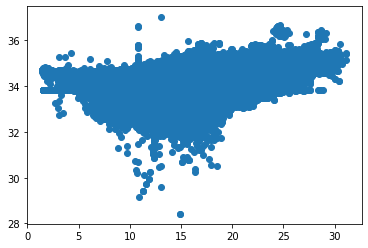

In [55]:
#Inspecting the relationship between the data 
plt.scatter(data['T_degC'], data['Salnty'])
plt.show()

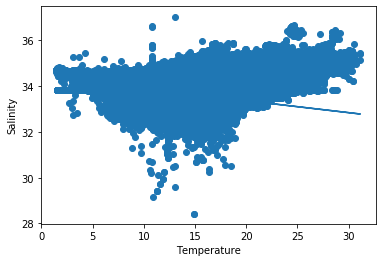

In [56]:
slope, intercept, r, p, std_err = stats.linregress(data['T_degC'], data['Salnty'])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, data['T_degC']))

plt.scatter(data['T_degC'], data['Salnty'])
plt.plot(data['T_degC'], mymodel, markersize = 2)
plt.xlabel("Temperature") 
plt.ylabel("Salinity")
plt.show()

In [57]:
#From the plot, the model suggests that salinity decreases as temperature increases 
print("Correlation Coefficient: {}".format(r))
print("Standard Error {}".format(std_err))

Correlation Coefficient: -0.4899671659151274
Standard Error 9.98146501241448e-05


In [58]:
#What is the salinity using the regression model for a temperature of 20 degrees?
print("The salinity is {}".format(myfunc(20)))

The salinity is 33.36034051511494


In [59]:
#The model did return a low correlation coefficient. What would happen if we deleted all the null rows instead? 
data['T_degC'] = data['T_degC'].dropna()
data['Salnty'] = data['Salnty'].dropna()

In [60]:
#All null values in the 2 columns have been deleted 
data.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
T_degC                      0
Salnty                      0
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
RecInd                      0
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
                        ...  
MeanAs                 842213
MeanAp                 844406
MeanAq    

In [61]:
data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.216841,0.449022,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.720000,33.504000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.130000,33.840350,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.830000,34.180000,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


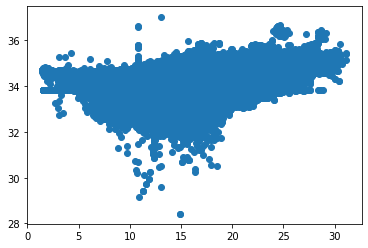

In [62]:
#Plotting the data again 
plt.scatter(data['T_degC'], data['Salnty'])
plt.show()

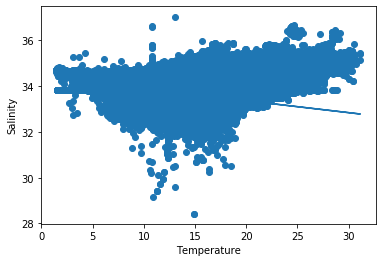

In [63]:
#Running the model again
slope, intercept, r, p, std_err = stats.linregress(data['T_degC'], data['Salnty'])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, data['T_degC']))

plt.scatter(data['T_degC'], data['Salnty'])
plt.plot(data['T_degC'], mymodel, markersize = 2)
plt.xlabel("Temperature") 
plt.ylabel("Salinity")
plt.show()

In [64]:
#Calculating the new correlation coefficient and standard error
print("Correlation Coefficient: {}".format(r))
print("Standard Error {}".format(std_err))

Correlation Coefficient: -0.4899671659151274
Standard Error 9.98146501241448e-05


In [65]:
#What is the salinity using the regression model for a temperature of 20 degrees?
print("The salinity is {}".format(myfunc(20)))

The salinity is 33.36034051511494


In [ ]:
#Deleting the null results instead of replacing with the mean has no impact on the results as expected 